<a href="https://colab.research.google.com/github/MrJellimann/machine_learning_homework/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 3**

Check out the GitHub repo: https://github.com/UgurUysal86/MLS4MIL/tree/master/Image%20Classification (Links to an external site.)

My former student Ugur Uysal created a synthetic dataset of military objects and fine-tuned a convnet to classify these objects.  This was one his projects for an independent study.

 

For this homework, you have to work with this synthetic dataset. Before you can train on colab, you have to carry out the steps below:

1. Download the zip file https://drive.google.com/file/d/1r-AZeKXd_SvSXwOcQuqX_w9q0F0nT-uW/view?usp=sharing (Links to an external site.) to your local computer and unzip it.

2. Look at the images of the different military objects to better understand the dataset.

3. Remove the civilian car folder.

4. Zip the folder (without civilian car) and upload it to your Google drive.

5. Start a new Colab notebook and mount your Google drive. Read the section "Mount Google drive locally" in https://colab.research.google.com/notebooks/io.ipynb (Links to an external site.)

6. Copy the dataset file to the Colab machine (you want to make sure that the data is locally available; you don't want to have to fetch the images over the network as you train)

7. Now you can access the dataset file.

 

Note that if you work for a company you may have to train machine learning models using instances in the cloud so you have to figure out how to get the dataset to the instance. The above steps mimic a little bit this process of getting data onto a remote instance.

 

Fine-tune a deep neural network to recognize the different military objects.

 

As the absolute minimum, you have to analyze Ugur's code and modify it so that the code doesn't expect the class "civilian cars".  

 

Try to get the best possible results, try to experiment with different pretrained convnets. It's your chance to put everything to use to solve a non-trivial computer vision problem.

Different pretrained convnets: https://keras.io/applications/ (Links to an external site.)

Try to see what happens as you crank up the batch size (when you got the powerful GPU).

Check our GPU

In [1]:
import tensorflow as tf
print("TensorFlow Version: " , tf.__version__, "\n")

from tensorflow.python.client import device_lib
for x in device_lib.list_local_devices():
   if x.device_type == "GPU":
     print("***** GPU Information *****")
     print("Device Name: " , x.name)
     print("Memory Limit: " , "%.2f" % float(x.memory_limit/(1000*1000*1000)), "GB")
     print("Description: " , x.physical_device_desc)

TensorFlow Version:  1.15.0 

***** GPU Information *****
Device Name:  /device:GPU:0
Memory Limit:  15.96 GB
Description:  device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Link up to Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Grab modified .zip of test files with bash

In [4]:
!rm -rf /content/HW3
!mkdir -p /content/HW3/datasets
!mkdir -p /content/HW3/trained_models/trained_weights
!mkdir -p /content/HW3/logs
!cp "/content/drive/My Drive/HW3_Data/RuTanks7000_v1.zip" /content/HW3/datasets
!unzip -q /content/HW3/datasets/RuTanks7000_v1.zip -d /content/HW3/datasets
print("Number of Training Images Unzipped:")
!ls -laR /content/HW3/datasets/train | grep -i jpg | wc -l
print("Number of Testing Images Unzipped:")
!ls -laR /content/HW3/datasets/test | grep -i jpg | wc -l
print("Subdirectories (Image Classes):")
!ls /content/HW3/datasets/train

Number of Training Images Unzipped:
42000
Number of Testing Images Unzipped:
90
Subdirectories (Image Classes):
Background  BMP2  Buk-M1-2  T14  T90  ZSU23


RuTanks_train.py from Ugur Uysal, with some modifications as specified by the assignment

Now, train using the provided dataset

Using TensorFlow backend.


Found 42000 images belonging to 6 classes.
Found 90 images belonging to 6 classes.














343613440/343610240 [==============================] - 10s 0us/step

### LEVEL1 ###
pretrained network:
Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 331, 331, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________

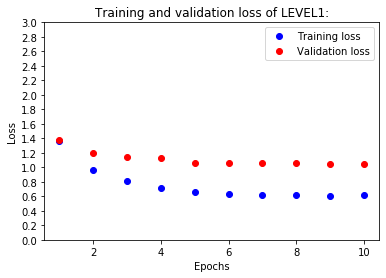

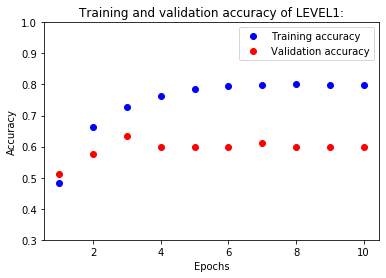


### LEVEL1 Training finished successfully ###

Loading trained weights from /content/HW3/trained_models/trained_weights/weights_temp.h5 ...

### Saving Level1 Model to  /content/HW3/trained_models/RuTanks7000_v2_l1.h5  ... 


### LEVEL2 ###

Loading trained weights from /content/HW3/trained_models/trained_weights/weights_temp.h5 ...

trainable layers before unfreezing the base network up to normal_add_1_15:  510
trainable layers after the base network unfreezed from layer normal_add_1_15:  71

LEVEL2 Model after unfreezing the base network
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Model)               (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None,

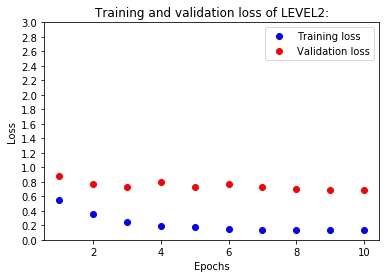

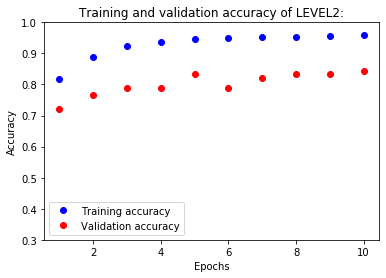


###LEVEL2 Training finished successfully ###
Time elapsed in minutes:  84.48377499641667


In [5]:
# Ugur Uysal
# ugur.uysal.86@gmail.com
# 02. Aug 2019

# imports
import os
from keras.applications import NASNetLarge
from keras import models, layers, optimizers, backend
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer


def main():
    start = timer()
    level1()  # Training the classifier only
    level2()  # Training the pretrained model + the trained classifier from level 1
    end = timer()
    print("Time elapsed in minutes: ", ((end - start)/60))

# Setting Parameters ##################################################################
# image settings
img_height,img_width = 331, 331  # For NASNetLarge

# classes
# new size 6, was 7
classnames = ["Background", "BMP2", "Buk-M1-2", "T14", "T90", "ZSU23"]
classes = len(classnames)

# original path settings
# path = 'C:\\Users\\uguru\\Documents\\ML4MIL\\'
# dataset_path = path+'datasets\\RuTanks7000_v1\\'
# weights_path = path+'trained_models\\trained_weights\\weights_temp.h5'
# model_path = path+'trained_models\\RuTanks7000_v1_'
# TensorBoardLogDir = path+'logs'

# new path settings
path = '/content/HW3/'
dataset_path = path + 'datasets/'
weights_path = path + 'trained_models/trained_weights/weights_temp.h5'
model_path = path + 'trained_models/RuTanks7000_v2_'
TensorBoardLogDir = path + 'logs'


# Unmodified Data Set -> 49000 images
# Modified Data Set -> 42000 images
nbrTrainImages = 7000  # per class
nbrTestImages = 0  # Value gets accurate after counting (Total Number of test images)
for ImagesClass in os.listdir(dataset_path+'test/'):
    nbrTestImages += len(os.listdir(dataset_path+'test/'+ImagesClass))

# unfreezing the base network up to a specific layer in Level2:
freezeUptoLayer = "normal_add_1_15"   # NASNetLarge

# hyperparameters
learning_rate = 0.0002  # Learning_rate in Level 2 = learning_rate/10
lr_decay = 0.0001
batch = 64
fcLayer1 = 32
dropout = 0.5

epochsL1 = 10
patiencel1 = 1
factorL1 = 0.5

epochsL2 = 10
patiencel2 = 1
factorL2 = 0.5

verbose_train = 1

# datagenerators https://keras.io/preprocessing/image/
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    dataset_path+'train',
    target_size=(img_height, img_width),
    batch_size=batch,
    shuffle=True,
    classes=classnames,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    dataset_path+'test',
    target_size=(img_height, img_width),
    batch_size=1,
    shuffle=True,
    classes=classnames,
    class_mode='categorical')
#########################################################################################

# function to plot results of model performance
def plot(h,t,e):
    history_dict = h[0]
    loss_values = history_dict['loss']
    validation_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    validation_acc_values = history_dict['val_acc']
    epochs_range = range(1, e + 1)

    # Plotting Training and Validation loss of the corresponding Model
    plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
    plt.plot(epochs_range, validation_loss_values, 'ro', label='Validation loss')
    plt.title('Training and validation loss of ' + t)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.yticks(np.arange(0, 3.1, step=0.2))
    plt.legend()
    plt.show()

    # Plotting Training and Validation accuracy of the corresponding Model
    plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
    plt.plot(epochs_range, validation_acc_values, 'ro', label='Validation accuracy')
    plt.title('Training and validation accuracy of ' + t)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.yticks(np.arange(0.3, 1.1, step=0.1))
    plt.legend()
    plt.show()


# LEVEL1 - Training of densely connected layers
def level1():
    # Building the model using the pretrained model
    conv_base1 = NASNetLarge(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    print("\n### LEVEL1 ###\npretrained network:")
    conv_base1.summary()
    model = models.Sequential()
    model.add(conv_base1)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(fcLayer1, activation='relu'))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(classes, activation='softmax'))

    # freezing the base network
    print("trainable layers bevor freezing:", int(len(model.trainable_weights)/2)) # weights = weights + bias = 2 pro layer
    conv_base1.trainable = False
    print("trainable layers after freezing:", int(len(model.trainable_weights)/2))
    print("\npretrained network + densely connected classifier")
    model.summary()

    # training the added layers only
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=learning_rate, decay=lr_decay), metrics=['acc'])

    callbacks_list_L1 = [ModelCheckpoint(filepath=weights_path, save_weights_only=True, monitor='val_acc', verbose=1, save_best_only=True),
                      ReduceLROnPlateau(monitor='val_acc', factor=factorL1, patience=patiencel1, verbose=1),
                      TensorBoard(log_dir=TensorBoardLogDir+'\\level1')]

    print("\n### Level1 Training ... ")
    # training the model
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=(nbrTrainImages * classes) // (batch * 5),
        epochs=epochsL1,
        callbacks=callbacks_list_L1,
        validation_data=test_generator,
        validation_steps=nbrTestImages,
        verbose=verbose_train)

    history_val1 = [history.history]  # saving all results of the final test
    plot(history_val1, "LEVEL1:", epochsL1)
    print("\n### LEVEL1 Training finished successfully ###")

    print("\nLoading trained weights from " + weights_path + " ...")
    model.load_weights(weights_path)
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=learning_rate), metrics=['acc'])
    print("\n### Saving Level1 Model to ", model_path+'l1.h5', " ... ")
    model.save(model_path+'l1.h5')


# LEVEL2 - Training pretrained network and trained densely connected layers
def level2():
    # Destroying the current TF graph - https://keras.io/backend/
    backend.clear_session()
    print("\n### LEVEL2 ###")
    conv_base2 = NASNetLarge(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    model2 = models.Sequential()
    model2.add(conv_base2)
    model2.add(layers.GlobalAveragePooling2D())
    model2.add(layers.Dense(fcLayer1, activation='relu'))
    model2.add(layers.Dropout(dropout))
    model2.add(layers.Dense(classes, activation='softmax'))

    print("\nLoading trained weights from " + weights_path + " ...")
    model2.load_weights(weights_path)

    # unfreezing the base network up to a specific layer:
    if freezeUptoLayer == "":
        conv_base2.trainable = True
        print ("\ntrainable layers: ",int(len(model2.trainable_weights) / 2))
    else:
        print("\ntrainable layers before unfreezing the base network up to " + freezeUptoLayer + ": ",int(len(model2.trainable_weights) / 2))  # weights = weights + bias = 2 pro layer
        conv_base2.trainable = True
        set_trainable = False
        for layer in conv_base2.layers:
            if layer.name == freezeUptoLayer: set_trainable = True
            if set_trainable: layer.trainable = True
            else: layer.trainable = False
        print("trainable layers after the base network unfreezed from layer " + freezeUptoLayer + ": ", int(len(model2.trainable_weights)/2))

    print("\nLEVEL2 Model after unfreezing the base network")
    model2.summary()
    model2.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=learning_rate/10, decay=lr_decay), metrics=['acc'])
    print ("\n### Validating ... ")

    val_loss, val_acc = model2.evaluate_generator(test_generator, steps=nbrTestImages, verbose=0)
    print('Validation Results before training unfreeze layers and trained densely connected layers:\nValidation loss:',val_loss,",",'Validation accuracy:', val_acc, "\n")

    # Jointly training both the unfreeze layers and the added trained densely connected layers
    callbacks_list_L2 = [ModelCheckpoint(filepath=model_path+'l2.h5', save_weights_only=False, monitor='val_acc', verbose=1, save_best_only=True),
                      ReduceLROnPlateau(monitor='val_acc', factor=factorL2, patience=patiencel2, verbose=1),
                      TensorBoard(log_dir=TensorBoardLogDir+'\\level2')]

    print ("\n### Level2 Training ... ")
    history = model2.fit_generator(
        train_generator,
        steps_per_epoch=(nbrTrainImages * classes) // (batch * 5),
        epochs=epochsL2,
        callbacks=callbacks_list_L2,
        validation_data=test_generator,
        validation_steps=nbrTestImages,
        verbose=verbose_train)

    history_val2 = [history.history]  # saving all results of the final test
    plot(history_val2, "LEVEL2:", epochsL2)
    print("\n###LEVEL2 Training finished successfully ###")


main()

# References
# Chollet, F. (2018). Deep learning with Python. Section 5.3 - Using a pretrained convnet.

